# Prepare Data

In [1]:
import pandas as pd

## Merge sheets

In [2]:
# df1 = pd.read_excel("Octopoda_Tickets.xlsx", sheet_name="OCTOPODA L2")
# df2 = pd.read_excel("Octopoda_Tickets.xlsx", sheet_name="OCTOPODA L3")
# print(df1.columns,df2.columns,sep="\n")
# df1 = df1.append(df2, ignore_index = True)
# # Remove the columns
# df1 = df1.drop(columns=['L1', 'L2', 'L3', 'L4', 'Ignore Skype state'], axis=1)
# # Print out the first rows of papers
# df1.head()
# df1.to_excel("data.xlsx", index=False)

## Read all data

In [3]:
df = pd.read_excel("data.xlsx")
print(df.columns)
df

Index(['Number', 'Caller', 'Short description', 'State', 'Priority',
       'Assignment group', 'Assigned to', 'Service offering',
       'Configuration item', 'Opened', 'Category', 'Subcategory',
       'Preferred callback time', 'Location', 'Country'],
      dtype='object')


Number                     Caller  \
0    INC1456034        Sudhakar Yalavarthi   
1    INC1487065           Robert Streicher   
2    INC1488388  Subhash Chandra Rangaraju   
3    INC1485103             Sudhir Kurmala   
4    INC1471620            Ayesha Chaudury   
..          ...                        ...   
225  INC1151785           Bhagyashri Gujar   
226  INC1108566         Vinutha Shivakumar   
227  INC1376222                  Lisa Katz   
228  INC1013742           Edward Klitenick   
229  INC1477869         Purushottam Ramesh   

                                     Short description     State  \
0                                 Data refresh request  Resolved   
1                  DDD and Octopoda Data Discrepancies   On Hold   
2    Unable to connect from our BI Cloudberry to S3...  Resolved   
3                     Slowness in Octopoda Environment  Resolved   
4    Unable to load RDC documents in both Productio...  Resolved   
..                                                 ...       ...   
225  New Octopoda Bitbucket  repository request for...    Closed   
226           Issue With Publishing Tableau Dashboards    Closed   
227                          Cannot sign into Octopoda    Closed   
228         Cannot download Octopoda iPad application     Closed   
229  Assistance request for scheduling SQL codes in...  Resolved   

         Priority         Assignment group         Assigned to  \
0         4 - Low  BI-ITEDS-US-OCTOPODA-L2     Harsheta Shetty   
1         4 - Low  BI-ITEDS-US-OCTOPODA-L2     Harsheta Shetty   
2    3 - Moderate  BI-ITEDS-US-OCTOPODA-L2    Garvit Chaudhary   
3         4 - Low  BI-ITEDS-US-OCTOPODA-L2  Chaitali Adgaonkar   
4         4 - Low  BI-ITEDS-US-OCTOPODA-L2     Harsheta Shetty   
..            ...                      ...                 ...   
225       4 - Low  BI-ITEDS-US-OCTOPODA-L3          David Satz   
226      2 - High  BI-ITEDS-US-OCTOPODA-L3          David Satz   
227       4 - Low  BI-ITEDS-US-OCTOPODA-L3          David Satz   
228  3 - Moderate  BI-ITEDS-US-OCTOPODA-L3          David Satz   
229       4 - Low  BI-ITEDS-US-OCTOPODA-L3          David Satz   

        Service offering      Configuration item                     Opened  \
0    BI-SAAS-US-OCTOPODA  AP_BI-SAAS-US-OCTOPODA 2021-02-15 10:12:34.000000   
1    BI-SAAS-US-OCTOPODA  AP_BI-SAAS-US-OCTOPODA 2021-02-23 11:59:20.000000   
2    BI-SAAS-US-OCTOPODA  AP_BI-SAAS-US-OCTOPODA 2021-02-23 23:06:44.000000   
3    BI-SAAS-US-OCTOPODA  AP_BI-SAAS-US-OCTOPODA 2021-02-23 05:39:46.000000   
4    BI-SAAS-US-OCTOPODA  BS_BI-SAAS-US-OCTOPODA 2021-02-18 23:22:35.999999   
..                   ...                     ...                        ...   
225  BI-SAAS-US-OCTOPODA                     NaN 2020-11-17 09:06:49.000000   
226  BI-SAAS-US-OCTOPODA                     NaN 2020-11-06 05:18:50.000000   
227  BI-SAAS-US-OCTOPODA  BS_BI-SAAS-US-OCTOPODA 2021-01-25 12:45:43.000001   
228  BI-SAAS-US-OCTOPODA                     NaN 2020-10-15 01:00:24.000000   
229  BI-SAAS-US-OCTOPODA  AP_BI-SAAS-US-OCTOPODA 2021-02-21 23:39:59.000000   

       Category  Subcategory Preferred callback time    Location  \
0    Assistance      Inquiry                     NaN  Ridgefield   
1    Assistance      Inquiry                     NaN  Ridgefield   
2    Assistance      Inquiry                     NaN   Singapore   
3    Assistance      Inquiry                     NaN  Ridgefield   
4         Fault       Defect                     NaN  Ridgefield   
..          ...          ...                     ...         ...   
225  Assistance      Inquiry                     NaN  Ridgefield   
226  Assistance      Inquiry                     NaN  Ridgefield   
227       Fault  Performance                     NaN  Ridgefield   
228  Assistance      Inquiry                     NaN  Ridgefield   
229  Assistance      Inquiry                     NaN  Ridgefield   

                      Country  
0    United States of America  
1    United Stat

## processing text

In [4]:
# Load the regular expression library
import re
# Remove punctuation
df['text'] = df['Short description'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['text'] = df['text'].map(lambda x: x.lower())
# Print out the first rows of papers
df['text'].head()

0                                 data refresh request
1                  ddd and octopoda data discrepancies
2    unable to connect from our bi cloudberry to s3...
3                     slowness in octopoda environment
4    unable to load rdc documents in both productio...
Name: text, dtype: object

# Pre-Processing

## Word Cloud

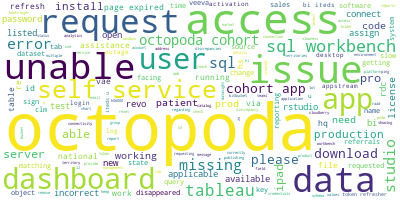

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## LDA

In [12]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'octopoda'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df["text"].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['data', 'refresh', 'request']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\703272232\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


# LDA

## 10 Topic

In [14]:
# number of topics
num_topics = 10

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
from pprint import pprint

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

# LDAvis_prepared

[(0,
  '0.033*"national" + 0.033*"dashboard" + 0.023*"please" + 0.012*"service" + '
  '0.012*"server" + 0.012*"tableau" + 0.012*"production" + 0.012*"issue" + '
  '0.012*"prod" + 0.012*"rstudio"'),
 (1,
  '0.036*"unable" + 0.036*"download" + 0.033*"access" + 0.031*"error" + '
  '0.021*"work" + 0.021*"able" + 0.021*"revo" + 0.021*"prod" + 0.021*"server" '
  '+ 0.016*"file"'),
 (2,
  '0.035*"unable" + 0.021*"data" + 0.021*"access" + 0.021*"password" + '
  '0.021*"pro" + 0.021*"working" + 0.014*"app" + 0.014*"studio" + '
  '0.014*"issue" + 0.014*"details"'),
 (3,
  '0.055*"app" + 0.031*"missing" + 0.025*"access" + 0.025*"cohort" + '
  '0.025*"bi" + 0.019*"please" + 0.019*"request" + 0.019*"service" + '
  '0.019*"data" + 0.013*"group"'),
 (4,
  '0.047*"access" + 0.043*"issue" + 0.039*"data" + 0.039*"sql" + '
  '0.031*"workbench" + 0.024*"request" + 0.024*"install" + 0.020*"unable" + '
  '0.016*"app" + 0.016*"incorrect"'),
 (5,
  '0.025*"available" + 0.017*"address" + 0.017*"dcr" + 0.017*"v

In [15]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.116912  0.004676       1        1  17.256180
6      0.178165  0.024843       2        1  12.179448
3      0.022479  0.116500       3        1  11.838531
8     -0.023137  0.055409       4        1  11.002846
2     -0.094946 -0.023676       5        1  10.654375
9     -0.100308  0.054921       6        1   8.695317
5     -0.005873 -0.175394       7        1   8.155841
1      0.006502 -0.015190       8        1   7.056092
7      0.068858 -0.038914       9        1   6.840072
0      0.065173 -0.003175      10        1   6.321299, topic_info=           Term       Freq      Total Category  logprob  loglift
24          sql  15.000000  15.000000  Default  30.0000  30.0000
101         app  14.000000  14.000000  Default  29.0000  29.0000
9        unable  16.000000  16.000000  Default  28.0000  28.0000
82         self  11.000000  11.000000  Default  27.0000  27.0000
83      service  12.000000  12.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
26         able   0.758706   6.237687  Topic10  -4.4395   0.6545
82         self   0.758692  11.033416  Topic10  -4.4395   0.0842
8       connect   0.758689   4.278928  Topic10  -4.4395   1.0314
72          pro   0.758682   6.335547  Topic10  -4.4395   0.6389
80   applicable   0.758675   4.356464  Topic10  -4.4395   1.0134

[529 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
26        1  0.160316     able
26        3  0.160316     able
26        4  0.160316     able
26        8  0.320632     able
26        9  0.160316     able
...     ...       ...      ...
117       5  0.385975  working
117       8  0.192988  working
179       4  0.712085     xref
231       4  0.469600       zs
231       8  0.469600       zs

[613 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 4, 9, 3, 10, 6, 2, 8, 1])

## 5 Topics

In [16]:
# number of topics
num_topics = 5

import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
from pprint import pprint

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

# LDAvis_prepared

[(0,
  '0.052*"access" + 0.030*"unable" + 0.030*"issue" + 0.024*"dashboard" + '
  '0.018*"studio" + 0.017*"please" + 0.015*"request" + 0.015*"install" + '
  '0.013*"pro" + 0.013*"download"'),
 (1,
  '0.031*"access" + 0.019*"app" + 0.019*"production" + 0.016*"request" + '
  '0.016*"service" + 0.016*"sql" + 0.016*"tableau" + 0.016*"self" + '
  '0.012*"workbench" + 0.012*"cohort"'),
 (2,
  '0.034*"app" + 0.033*"missing" + 0.029*"unable" + 0.020*"cohort" + '
  '0.016*"data" + 0.015*"user" + 0.015*"page" + 0.015*"expired" + '
  '0.011*"access" + 0.011*"issue"'),
 (3,
  '0.022*"data" + 0.019*"self" + 0.019*"tableau" + 0.019*"applicable" + '
  '0.019*"service" + 0.019*"listed" + 0.015*"issue" + 0.015*"error" + '
  '0.012*"unable" + 0.012*"please"'),
 (4,
  '0.046*"sql" + 0.032*"workbench" + 0.027*"data" + 0.021*"access" + '
  '0.018*"request" + 0.018*"service" + 0.015*"pro" + 0.015*"self" + '
  '0.011*"studio" + 0.011*"error"')]


In [24]:
from operator import itemgetter

ts = []
conf = []

for i in range(len(corpus)):
    t,c = max(lda_model[corpus[i]], key=itemgetter(1))
    ts.append(t)
    conf.append(c)

df["topic"] = ts
df["confidence"] = conf

In [17]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.011407  0.073075       1        1  25.317609
3     -0.048815 -0.118671       2        1  20.028589
2     -0.109441  0.051421       3        1  18.845056
4      0.111883 -0.010340       4        1  17.907971
1      0.034966  0.004515       5        1  17.900775, topic_info=           Term       Freq      Total Category  logprob  loglift
100     missing   7.000000   7.000000  Default  30.0000  30.0000
24          sql  15.000000  15.000000  Default  29.0000  29.0000
25    workbench  10.000000  10.000000  Default  28.0000  28.0000
80   applicable   4.000000   4.000000  Default  27.0000  27.0000
81       listed   4.000000   4.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
24          sql   2.864287  15.447606   Topic5  -4.1520   0.0352
25    workbench   2.181995  10.031471   Topic5  -4.4240   0.1948
5            bi   1.497897   6.508194   Topic5  -4.8002   0.2513
9        unable   1.519062  17.319944   Topic5  -4.7862  -0.7134
26         able   1.494594   6.349782   Topic5  -4.8024   0.2738

[300 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
26        1  0.314971     able
26        2  0.314971     able
26        4  0.157486     able
26        5  0.157486     able
23        1  0.489502   access
...     ...       ...      ...
117       1  0.403811  working
117       3  0.201905  working
117       5  0.403811  working
179       5  0.724022     xref
231       4  0.504658       zs

[359 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 5, 2])

In [27]:
df.to_excel("Octopoda_Tickets-topic_modelling.xlsx", index=False)